In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('train_cleaned.csv')

In [5]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [8]:
x = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = 56)

In [13]:
train_x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
178,0.000,0.191014,42.1112,1985,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3644,18.000,0.015482,159.3604,2002,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3197,0.000,0.042949,199.5742,1985,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1791,0.000,0.081014,98.8384,1985,0,1,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0
2184,6.675,0.041921,92.3462,1997,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [15]:
test_y.head()

2172     697.7584
6228    1414.1592
2404    3078.6592
99      1314.2892
4945    1403.5064
Name: Item_Outlet_Sales, dtype: float64

In [14]:
train_y.head()

178       42.6112
3644    2059.9852
3197    3981.4840
1791     492.6920
2184    2406.2012
Name: Item_Outlet_Sales, dtype: float64

In [10]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [11]:
lr = LR()

In [12]:
lr.fit(train_x , train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training mean absolute error',k)

Training mean absolute error 821.4206146753681


In [19]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test mean absolute error', k)

Test mean absolute error 875.2688982985246


In [20]:
lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

Text(0.5, 1.0, 'Coefficients plot')

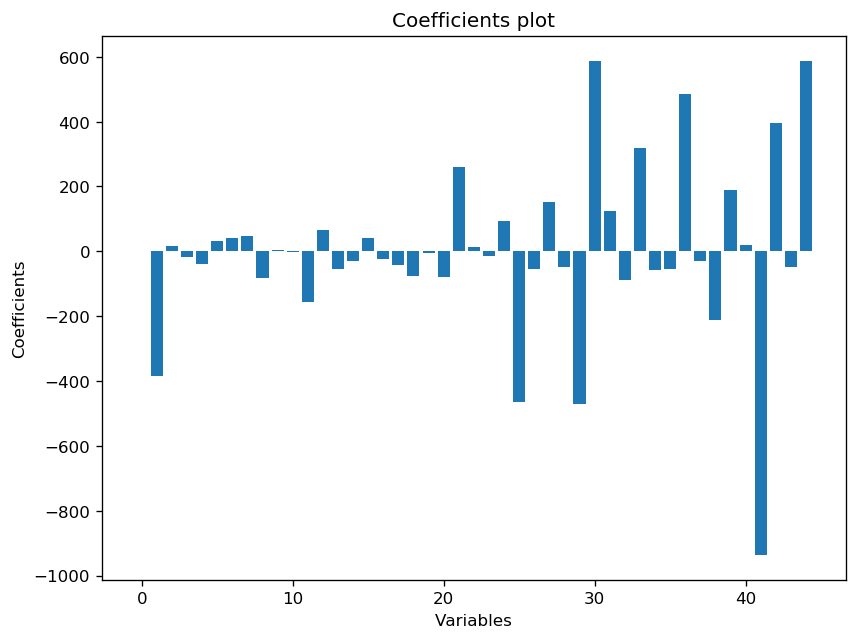

In [21]:
plt.figure(figsize = (8,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title("Coefficients plot")

In [22]:
residuals = pd.DataFrame({'fitted values': test_y, 'predicted values':test_predict})
residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


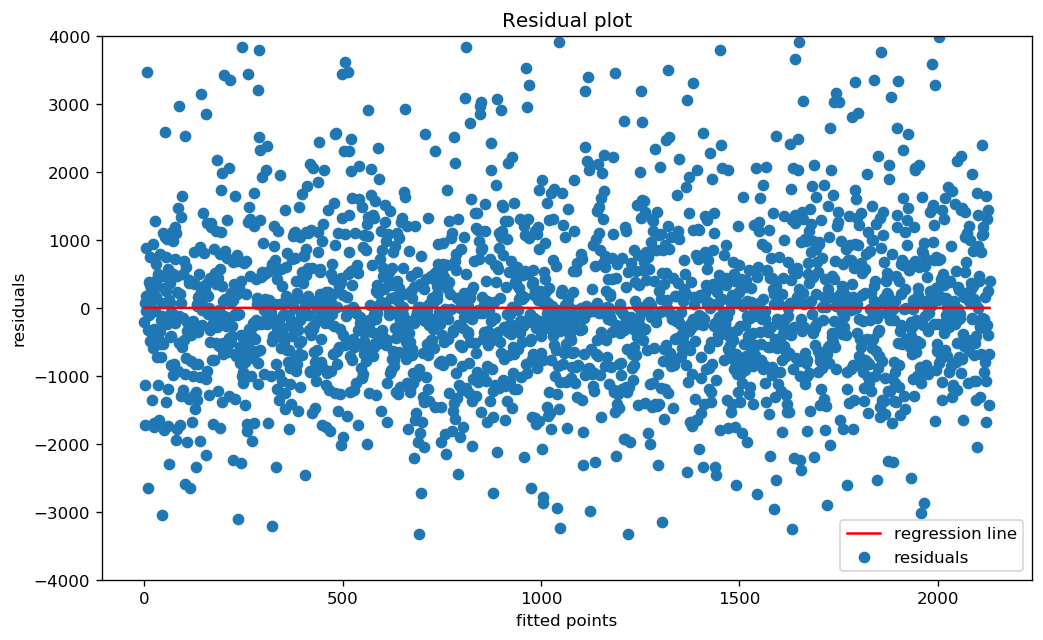

In [24]:
plt.figure(figsize = (10,6), dpi =120, facecolor='w', edgecolor = 'b')
f = range(0,2131)
k = [0 for i in range(0,2131)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot(f,k,color = 'red', label = 'regression line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000,4000)
plt.legend()